In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../dataset/autism/train.csv")

In [3]:
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
df.drop("contry_of_res", axis="columns", inplace=True)
df.drop("ethnicity", axis="columns", inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  used_app_before  800 non-null    object 
 16  result           800 non-null    float64
 17  age_desc        

In [7]:
def preprocess(data : pd.DataFrame):
    data_temp = data.copy()
    data_temp = data_temp.drop(['age_desc','relation'],axis = 1)
    data_temp['gender'] = data_temp['gender'].map(lambda x : 1 if x == 'm' else 0)
    data_temp['used_app_before'] = data_temp['used_app_before'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['jaundice'] = data_temp['jaundice'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['austim'] = data_temp['austim'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['age'] = (data_temp['age'] - min(data_temp['age']))/(max(data_temp['age']) - min(data_temp['age']))
    data_temp['result'] = (data_temp['result'] - min(data_temp['result']))/(max(data_temp['result']) - min(data_temp['result']))
    data_temp = data_temp.drop(['ID'],axis = 1)
    return data_temp

df = preprocess(df)

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('Class/ASD',axis=1),df['Class/ASD'])

c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


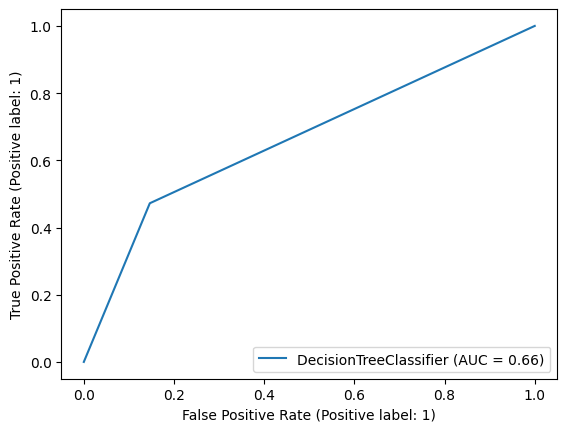

In [9]:
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)
pred = model.predict(x_test)
plot_roc_curve(model,x_test,y_test)


c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


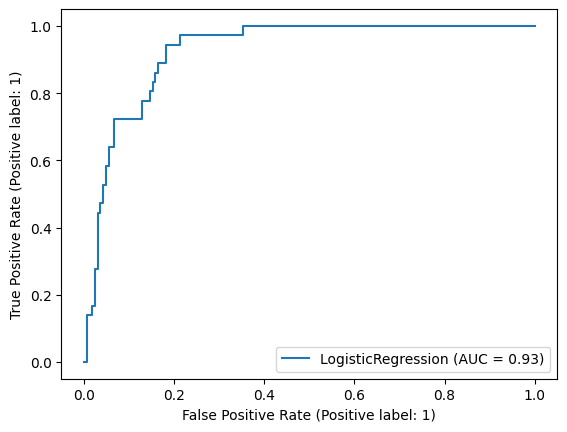

In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

plot_roc_curve(model, x_test, y_test)

In [11]:
import pickle

In [12]:
filename = 'autism_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open('autism_model.sav', 'rb'))